<a href="https://colab.research.google.com/github/Juanafenley/avanzadoIA/blob/main/Trabajo_pr%C3%A1ctico_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo práctico - Redes Neuronales

**Alumnos:** Juana Fenley, Vicente Brusa, Agustina Gonzalez Avola.

**Curso:** 4ºC

**Año:** 2023

##Consigna 1 & 2

**Dataset:**
https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows/

In [1]:
#Importamos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate
import networkx as nx
from random import random as rand
import itertools

In [2]:
np.random.seed(1)

In [3]:
#Definimos que la pinta que va a tener nuestra red es sigmoide
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

# sigmoid = lambda x : 1 / ( 1 + np.exp(-x) )

def sigmoid_derivative(x):
    return x * (1 - x)

# sigmoid_derivative = lambda x : x * (1 - x)

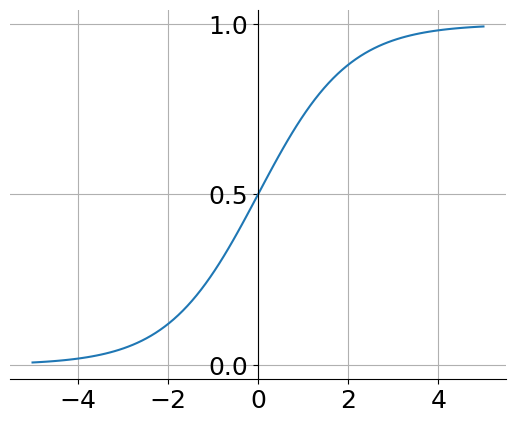

In [4]:
x = np.linspace(-5,5,100)
y = sigmoid(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.plot(x, y)
plt.locator_params(axis='y', nbins=3)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid()

In [5]:
#Guardamos nuestro Dataset en la variable "datos"
datos:pd.DataFrame= pd.read_csv('imdb_top_1000.csv')
datos

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [6]:
#Eliminamos las columnas que no nos sirven
datos_new=datos.drop(['Poster_Link','Series_Title', 'Overview', 'Gross'],1)

<ipython-input-6-ed1e42e4560b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  datos_new=datos.drop(['Poster_Link','Series_Title', 'Overview', 'Gross'],1)


In [7]:
# Filtramos las filas en las que la columna 'Released_Year' no es igual a "PG"
datos : pd.DataFrame= datos[datos["Released_Year"] != "PG"]

In [8]:
# Creamos un DataFrame llamado "training_inputs" que contiene los datos de la variable "datos" que utilizaremos como entradas por lo que eliminando algunas columnas
training_inputs: pd.DataFrame = datos.drop(['Poster_Link','Series_Title','Certificate','Overview','Director','Star1','Genre', 'Star2', 'Star3', 'Star4'],1)

# Creamos una Serie llamada "training_outputs" que contiene los datos de la columna 'Genre' del DataFrame "datos_new". Esta Serie son las salidas o sea lo que va a intentar predecir el modelo.

training_outputs: pd.Series = datos_new.Genre

display(training_inputs)
display(training_outputs)

<ipython-input-8-e0c2a23f51d5>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  training_inputs: pd.DataFrame = datos.drop(['Poster_Link','Series_Title','Certificate','Overview','Director','Star1','Genre', 'Star2', 'Star3', 'Star4'],1)


,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,1994,142 min,9.3,80.0,2343110,"28,341,469"
1,1972,175 min,9.2,100.0,1620367,"134,966,411"
2,2008,152 min,9.0,84.0,2303232,"534,858,444"
3,1974,202 min,9.0,90.0,1129952,"57,300,000"
4,1957,96 min,9.0,96.0,689845,"4,360,000"
...,...,...,...,...,...,...
995,1961,115 min,7.6,76.0,166544,NaN
996,1956,201 min,7.6,84.0,34075,NaN
997,1953,118 min,7.6,85.0,43374,"30,500,000"
998,1944,97 min,7.6,78.0,26471,NaN


0                         Drama
1                  Crime, Drama
2          Action, Crime, Drama
3                  Crime, Drama
4                  Crime, Drama
                 ...           
995      Comedy, Drama, Romance
996              Drama, Western
997         Drama, Romance, War
998                  Drama, War
999    Crime, Mystery, Thriller
Name: Genre, Length: 1000, dtype: object

In [9]:
# definimos la función  eval_NN
#Función de activación: le damos la forma/pinta a nuestra red neuronal en este caso va a ser como la función sigmoide
eval_NN = lambda x, w: sigmoid(np.dot(x, w))

In [10]:
datos['Genre']: pd.DataFrame = datos['Genre'].astype(str)# Convertimos todo en string
datos['Genre']: pd.DataFrame = datos['Genre'].str.replace(' ', '')  # Eliminamos espacios en blanco
datos['Genre'] : pd.DataFrame= datos['Genre'].str.split(',')# Separamos por cada ","

<ipython-input-10-e0435c371e98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Genre']: pd.DataFrame = datos['Genre'].astype(str)# Convertimos todo en string
<ipython-input-10-e0435c371e98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Genre']: pd.DataFrame = datos['Genre'].str.replace(' ', '')  # Eliminamos espacios en blanco
<ipython-input-10-e0435c371e98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [11]:
generos:list = [] # Creamos una lista vacía para almacenar los géneros
for genre1 in datos['Genre']: # "Recorremos" cada fila en la columna 'Genre' de 'datos'

    for genre in genre1: # Vemos los géneros de cada fila
        if genre != 'None' and genre not in generos:
            generos.append(genre)
#Si el género no es 'None' y no está en la lista de géneros, lo agregamos

In [ ]:
# Creamos columnas separadas para cada género y llenamos con 0 o 1 si pertenece o no al género
for genre in generos:
    datos[genre] = datos['Genre'].apply(lambda x: 1 if genre in x else 0)

In [ ]:
# Eliminamos la columna original "Genres"
datos.drop('Genre', axis=1, inplace=True)

In [14]:
display(datos)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,...,Thriller,Animation,Family,War,Mystery,Music,Horror,Musical,Film-Noir,Sport
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,...,0,0,0,0,0,0,0,0,0,0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,...,0,0,0,0,0,0,0,0,0,0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,...,0,0,0,0,0,0,0,0,0,0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,...,0,0,0,0,0,0,0,0,0,0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,...,0,0,0,0,0,0,0,0,0,0
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,...,0,0,0,0,0,0,0,0,0,0
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,...,0,0,0,1,0,0,0,0,0,0
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,...,0,0,0,1,0,0,0,0,0,0


In [15]:
generos_matriz : pd.DataFrame= datos.drop(['Poster_Link', 'Series_Title','Released_Year',	'Certificate','Runtime','IMDB_Rating','Overview','Meta_score',	'Director','Star1', 'Star2', 'Star3', 'Star4','No_of_Votes','Gross'],1 )

<ipython-input-15-b3f04d7587dd>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  generos_matriz : pd.DataFrame= datos.drop(['Poster_Link', 'Series_Title','Released_Year',	'Certificate','Runtime','IMDB_Rating','Overview','Meta_score',	'Director','Star1', 'Star2', 'Star3', 'Star4','No_of_Votes','Gross'],1 )


In [16]:
print (generos_matriz)

     Drama  Crime  Action  Adventure  Biography  History  Sci-Fi  Romance  \
0        1      0       0          0          0        0       0        0   
1        1      1       0          0          0        0       0        0   
2        1      1       1          0          0        0       0        0   
3        1      1       0          0          0        0       0        0   
4        1      1       0          0          0        0       0        0   
..     ...    ...     ...        ...        ...      ...     ...      ...   
995      1      0       0          0          0        0       0        1   
996      1      0       0          0          0        0       0        0   
997      1      0       0          0          0        0       0        1   
998      1      0       0          0          0        0       0        0   
999      0      1       0          0          0        0       0        0   

     Western  Fantasy  ...  Thriller  Animation  Family  War  Mystery  Musi

In [17]:
#Calculamos el número de columnas en el DataFrame 'training_inputs' y lo almacenamos en 'n'
#Estructura de la Red: n (6) es la cantidad de entradas que tiene nuestro modelo, m (21) la cantidad de salidas y synaptic_weights son los pesos de cada entrada (21 cada n)
n :int = training_inputs.shape[1]
# Calculamos el número de columnas en el DataFrame 'generos_matriz' y lo almacenamos en 'm'
m :int = generos_matriz.shape[1]
# Generamos una matriz de pesos aleatorios con dimensiones (n, m)
synaptic_weights = 2 + np.random.random((n, m)) - 1
synaptic_weights: pd.DataFrame = synaptic_weights.astype(float)
synaptic_weights.shape

(6, 21)

In [18]:
synaptic_weights

array([[1.417022  , 1.72032449, 1.00011437, 1.30233257, 1.14675589,
        1.09233859, 1.18626021, 1.34556073, 1.39676747, 1.53881673,
        1.41919451, 1.6852195 , 1.20445225, 1.87811744, 1.02738759,
        1.67046751, 1.4173048 , 1.55868983, 1.14038694, 1.19810149,
        1.80074457],
       [1.96826158, 1.31342418, 1.69232262, 1.87638915, 1.89460666,
        1.08504421, 1.03905478, 1.16983042, 1.8781425 , 1.09834683,
        1.42110763, 1.95788953, 1.53316528, 1.69187711, 1.31551563,
        1.68650093, 1.83462567, 1.01828828, 1.75014431, 1.98886109,
        1.74816565],
       [1.28044399, 1.78927933, 1.10322601, 1.44789353, 1.9085955 ,
        1.29361415, 1.28777534, 1.13002857, 1.01936696, 1.67883553,
        1.21162812, 1.26554666, 1.49157316, 1.05336255, 1.57411761,
        1.14672857, 1.58930554, 1.69975836, 1.10233443, 1.41405599,
        1.69440016],
       [1.41417927, 1.04995346, 1.53589641, 1.66379465, 1.51488911,
        1.94459476, 1.58655504, 1.90340192, 1.1374747

In [19]:
training_inputs

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,1994,142 min,9.3,80.0,2343110,"28,341,469"
1,1972,175 min,9.2,100.0,1620367,"134,966,411"
2,2008,152 min,9.0,84.0,2303232,"534,858,444"
3,1974,202 min,9.0,90.0,1129952,"57,300,000"
4,1957,96 min,9.0,96.0,689845,"4,360,000"
...,...,...,...,...,...,...
995,1961,115 min,7.6,76.0,166544,NaN
996,1956,201 min,7.6,84.0,34075,NaN
997,1953,118 min,7.6,85.0,43374,"30,500,000"
998,1944,97 min,7.6,78.0,26471,NaN


In [20]:
# Creamos una nueva columna que almacena la duración de la película sin el texto 'min'.
training_inputs["runtime_alt"] = training_inputs.Runtime.str.split( 'min').apply(lambda x: x[0])
# Eliminamos la columna 'Runtime'
training_inputs=training_inputs.drop(['Runtime'], 1)

<ipython-input-20-441b390c9c27>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  training_inputs=training_inputs.drop(['Runtime'], 1)


In [21]:
# Rellenamos los valores nulos en la columna 'Gross' con 0 y eliminamos las comas
training_inputs["Gross"]: pd.DataFrame = training_inputs["Gross"].fillna(0).str.replace(",", "")

In [22]:
# Convertimos  las columnas de 'training_inputs' a float
training_inputs: pd.DataFrame = training_inputs.astype(float)

In [23]:
#Convertimos los valores nan de la columna Gross y Meta_score en 0
training_inputs['Gross']=training_inputs['Gross'].fillna(0)
training_inputs['Meta_score']=training_inputs['Meta_score'].fillna(0)

In [24]:
# 50000 epochs
for iteration in range(50000):

    # Arranca con los valores de training. Es nuestra layer/capa de entrada donde llegan los datos con los que predeciremos
    input_layer = training_inputs
    # Genera un output haciendo la suma de los valores de input multiplicados por su peso sinaptico, y aplicandole la función sigmoide para normalizar a -1, 1
    outputs = eval_NN(input_layer, synaptic_weights)#(Forward propagation) Esta multiplicando las entradas por los pesos para llegar a los resultados (salidas)

    # Calculo el error
    error = generos_matriz - outputs

    # Ajusto los pesos en funcion al error y al resultado obtenido (Back propagation: como dijimos antes lo que está haciendo es correr la función "de atrás para adelante", ya que está ajustando los pesos en función de la diferencia entre las salidas)
    adjustments = error * sigmoid_derivative(outputs)
    synaptic_weights += np.dot(input_layer.T, adjustments)#Gradiente descendente: ajustamos los pesos para obtener el que menor error nos dara (óptimo local)

In [25]:
print('Synaptic weights after training')
print(synaptic_weights)

print('Outputs after training: ')
print(outputs)

Synaptic weights after training
[[1.417022   1.72032449 1.00011437 1.30233257 1.14675589 1.09233859
  1.18626021 1.34556073 1.39676747 1.53881673 1.41919451 1.6852195
  1.20445225 1.87811744 1.02738759 1.67046751 1.4173048  1.55868983
  1.14038694 1.19810149 1.80074457]
 [1.96826158 1.31342418 1.69232262 1.87638915 1.89460666 1.08504421
  1.03905478 1.16983042 1.8781425  1.09834683 1.42110763 1.95788953
  1.53316528 1.69187711 1.31551563 1.68650093 1.83462567 1.01828828
  1.75014431 1.98886109 1.74816565]
 [1.28044399 1.78927933 1.10322601 1.44789353 1.9085955  1.29361415
  1.28777534 1.13002857 1.01936696 1.67883553 1.21162812 1.26554666
  1.49157316 1.05336255 1.57411761 1.14672857 1.58930554 1.69975836
  1.10233443 1.41405599 1.69440016]
 [1.41417927 1.04995346 1.53589641 1.66379465 1.51488911 1.94459476
  1.58655504 1.90340192 1.1374747  1.13927635 1.80739129 1.39767684
  1.1653542  1.92750858 1.34776586 1.7508121  1.72599799 1.88330609
  1.62367221 1.75094243 1.34889834]
 [1.26992

In [26]:
large = lambda x : display(HTML('<p style="font-size: 50px; color: #66D148">'+str(x)+'</p>'))

In [27]:
input_layer

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross,runtime_alt
0,1994.0,9.3,80.0,2343110.0,28341469.0,142.0
1,1972.0,9.2,100.0,1620367.0,134966411.0,175.0
2,2008.0,9.0,84.0,2303232.0,534858444.0,152.0
3,1974.0,9.0,90.0,1129952.0,57300000.0,202.0
4,1957.0,9.0,96.0,689845.0,4360000.0,96.0
...,...,...,...,...,...,...
995,1961.0,7.6,76.0,166544.0,0.0,115.0
996,1956.0,7.6,84.0,34075.0,0.0,201.0
997,1953.0,7.6,85.0,43374.0,30500000.0,118.0
998,1944.0,7.6,78.0,26471.0,0.0,97.0


In [28]:
a = 1 #@param {type:"integer"}
c = 1 #@param {type:"integer"}
b = 1 #@param {type:"integer"}
d = 1 #@param {type:"integer"}
e = 1 #@param {type:"integer"}
f = 1 #@param {type:"integer"}

input_layer = np.array([a, b, c, d, e, f])
res = sigmoid(np.dot(input_layer, synaptic_weights))[0]
display(res)

thresh = 0.01
out = 0 if res < thresh else 1

large(out)

0.9998732535094816

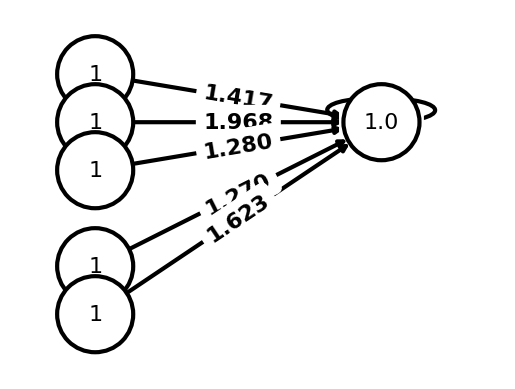

In [29]:
G = nx.DiGraph()
layers = [[0, 1, 2, 3, 4, 5], [3]]

rels = list(itertools.product(*layers))
#rels.append((3, 4))
flatten = lambda l: [x for i in l for x in i]

labels = {i: v for i, v in enumerate(input_layer)}
labels[3] = round(res, 3)
#labels[4] = 0 if res < thresh else 1

pos = {}
m = max([len(l) for l in layers])
for i, l in enumerate(layers):
  for j, v in enumerate(l):
    pos[v] = (i, len(l) - j)

pos[3] = (pos[3][0], pos[1][1])
#pos[4] = (pos[3][0] + 1, pos[1][1])

weights_labels = {(ra, rb): "{:0.3f}".format(synaptic_weights[i][0]) for i, (ra, rb) in enumerate(rels)}
G.add_edges_from(rels)

options = {
    "font_size": 16,
    "node_size": 3000,
    "node_color": [(1, 1, 1, 1) for _ in range(len(labels))],
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
    "labels": labels,
    "connectionstyle": "arc3, rad=0",
}

nx.draw_networkx(G, pos, **options)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=weights_labels,
    font_color='black',
    font_size=16,
    font_weight='bold'
)

plt.axis('off')
ax = plt.gca()
ax.margins(0.20)
plt.show()

##BONUS

## N° 1

A. ¿Como modificarían la estructura de la red para que admita k capas ocultas con n neuronas cada una? Describir como sería el algoritmo de forward propagation en este caso, no es necesario implementar el algoritmo de back propagation.

En este momento nuestra red tiene una input layer de 6 entradas/neuronas en donde cada una tiene "asignada" 21 pesos y una outputlayer de 21 salidas/neuronas. La fromula que se les aplica a las entradas para llegar a las salidas es a(input layer* pesos) o sea se le aplica la función activación, en este caso sigmoide, a la multiplicación de matrices. Si quisiera agregar una capa oculta debería cambiar mi matriz de pesos para que sus dimensiones sean la cantidad de neuronas de input layer (n) y la cantidad de neuronas de la capa siguiente (m) quedando (n , m) y luego crear otra matriz de pesos de la forma (m, z) siendo z la cantidad de salidas del modelo. Para llegar a las salidas debería aplicar la formula antes mencionada (a (input layer * pesos)) asignando los valores obtenidos a las neuronas de la capa oculta y luego volver a aplicar esa formula a la capa oculta ( a ( hiden layer * pesos2)) para finalmente obtener las salidas. Los pesos y la función activación no tiene que ser necesariamente la misma las dos veces que se aplica.

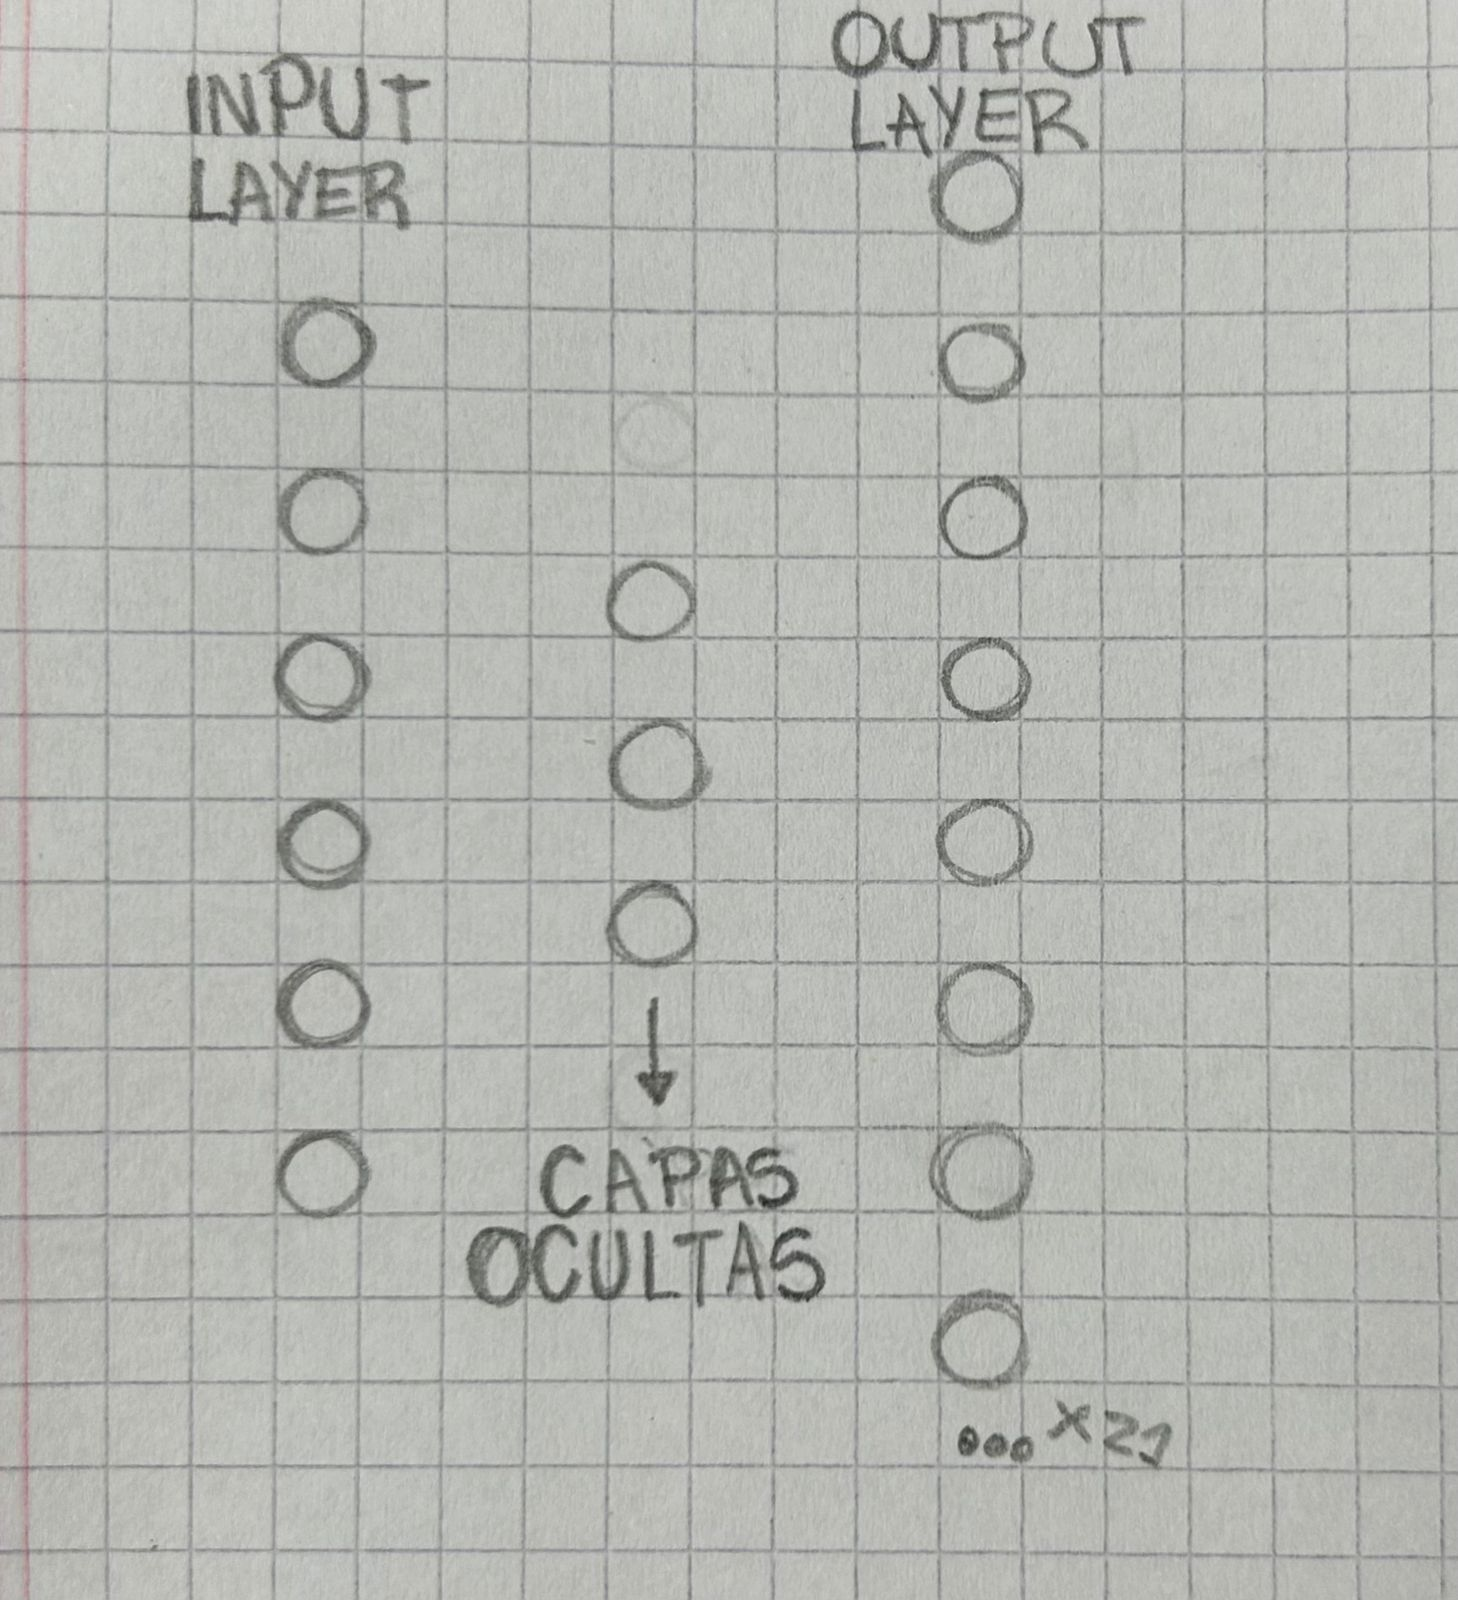

###Nº2

***Investigar la función de activación Softmax y explicar como se puede utilizar para resolver un problema de clasificación con m clases mutualmente excluyentes.¿Que habría que modificar en el código para utilizar esta función de activación?***

La función de activación Softmax es utilizada generalmente en redes neuronales que se encargan de resolver problemas de clasificación con varias clases mutualmente excluyentes. Lo que hace esta función es convertir un vector de números reales en un vector de probabilidades. En otras palabras, calcula la probabilidad de que la entrada pertenezca a cada clase del modelo en función de los resultados obtenidos al evaluar esa entrada en cada una de las clases.

La suma de todas las probabilidades es igual a 1. Finalmente, la clase con la probabilidad más alta se selecciona como la predicción del modelo.

[Link al video](https://www.youtube.com/watch?v=ma-F0RsMAjQ )

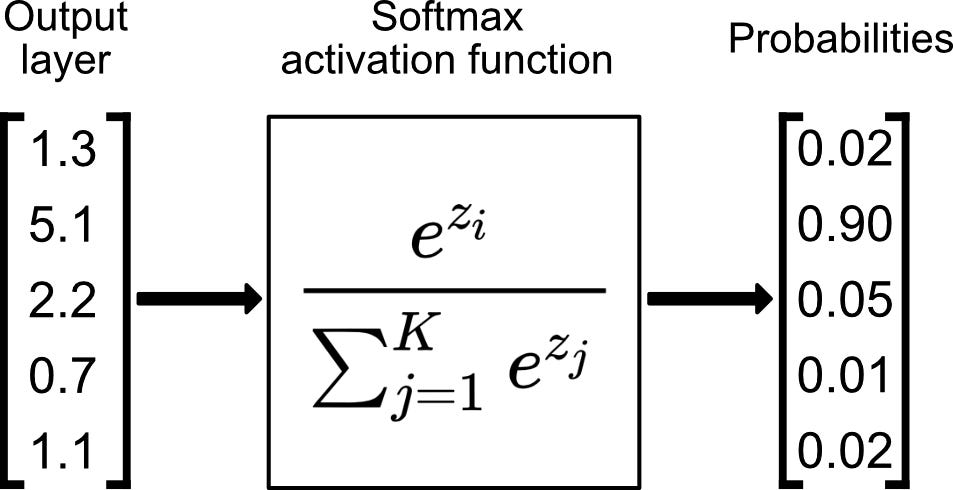

**Para implementar esta función en el código debería:**

- Cambiar la función de activación de sigmoide a Softmax (cuando se define):

In [32]:
"""def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Aplicar el softmax de manera numéricamente estable
    return exp_x / exp_x.sum(axis=0, keepdims=True)

def softmax_derivative(x):
    return x * (1 - x)"""

'def softmax(x):\n    exp_x = np.exp(x - np.max(x))  # Aplicar el softmax de manera numéricamente estable\n    return exp_x / exp_x.sum(axis=0, keepdims=True)\n\ndef softmax_derivative(x):\n    return x * (1 - x)'

- En la función eval_NN:

In [33]:
#eval_NN = lambda x, w: softmax(np.dot(x, w))

- Modificar la forma de las salidas de la red ya que ahora, la función Softmax dará como resultado un vector de probabilidades para cada entrada, donde cada valor representa la probabilidad de pertenencia a una clase.